In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.read_csv('E:/NCHU_PHD/10902sml/housing.data', header=None, sep='\s+')

X=data.iloc[:,:-1]
X[X.columns] = scaler.fit_transform(X[X.columns])
Y=data.iloc[:,-1]

data.isnull().sum()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
X_train=X_train.reset_index(drop = True)
Y_train=Y_train.reset_index(drop=True)

# Orginal and model 3


In [179]:
class DeepLearning:
    """
    This class defines the vanilla optimization of a deep learning model.
    Args:
        layer_of_units (list): A list to specify the number of units in each layer.
    """
    def __init__(self, layer_of_units,epochs):
        self.random = np.random.RandomState(2)

        self._n_layers = len(layer_of_units)
        self.epochs=epochs
        parameters = {}
        for i in range(self._n_layers - 1):
            parameters['W{}'.format(i + 1)] = self.random.rand(layer_of_units[i + 1], layer_of_units[i])
            parameters['B{}'.format(i + 1)] = self.random.rand(layer_of_units[i + 1], 1)
        self._parameters = parameters

    def single_layer_forward_propagation(self, A_previous, W_current, B_current):
        """
        This function returns the output of a single layer of forward propagation.
        Args:
            A_previous (ndarray): The Sigmoid output from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
        """
        Z_current = np.dot(W_current, A_previous) + B_current
        A_current = Z_current
        return A_current, Z_current
    def forward_propagation(self):
        """
        This function returns the output of a complete round of forward propagation.
        """
        self._m = self._X_train.shape[0]
        X_train_T = self._X_train.copy().T
        cache = {}
        A_current = X_train_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            cache["A{}".format(i)] = A_previous
            cache["Z{}".format(i + 1)] = Z_current
        self._cache = cache
        self._A_current = A_current

    def single_layer_backward_propagation(self, dA_current, W_current, B_current, Z_current, A_previous):
        """
        This function returns the output of a single layer of backward propagation.
        Args:
            dA_current (ndarray): The output of the derivative of Sigmoid function from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
            Z_current (ndarray): The multiplication of weights, bias and output from previous layer.
            A_previous (ndarray): The Sigmoid output from previous layer.
        """
        dZ_current = dA_current 
        dW_current = np.dot(dZ_current, A_previous.T) / self._m
        dB_current = np.sum(dZ_current, axis=1, keepdims=True) / self._m
        dA_previous = np.dot(W_current.T, dZ_current)
        return dA_previous, dW_current, dB_current
    def backward_propagation(self):
        """
        This function performs a complete round of backward propagation to update weights and bias.
        """
        gradients = {}
        self.forward_propagation()
        Y_hat = self._A_current.copy()
        Y_train = self._y_train.copy().reshape(1, self._m)
        dA_previous = - 2*(Y_train-Y_hat)
        for i in reversed(range(dl._n_layers - 1)):
            dA_current = dA_previous
            A_previous = self._cache["A{}".format(i)]
            Z_current = self._cache["Z{}".format(i+1)]
            W_current = self._parameters["W{}".format(i+1)]
            B_current = self._parameters["B{}".format(i+1)]
            dA_previous, dW_current, dB_current = self.single_layer_backward_propagation(dA_current, W_current, B_current, Z_current, A_previous)
            gradients["dW{}".format(i + 1)] = dW_current
            gradients["dB{}".format(i + 1)] = dB_current
        self._gradients = gradients
    def cost_function(self):
        """
        This function returns the cross entropy given weights and bias.
        """
        Y_hat = self._A_current.copy()
        self._Y_hat = Y_hat
        Y_train = self._y_train.copy().reshape(1, self._m)
        ce =  (Y_train-Y_hat)**2
        
        return np.sum(ce)
    #def accuracy_score(self):
    #    """
    #    This function returns the accuracy score given weights and bias.
    #    """
    #    p_pred = self._Y_hat.ravel()
    #    y_pred = np.where(p_pred > 0.5, 1, 0)
    #    y_true = self._y_train
    #    accuracy = (y_pred == y_true).sum() / y_pred.size
    #    return accuracy
    def gradient_descent(self):
        """
        This function performs vanilla gradient descent to update weights and bias.
        """
        for i in range(self._n_layers - 1):
            self._parameters["W{}".format(i + 1)] -= self._learning_rate * self._gradients["dW{}".format(i + 1)]
            self._parameters["B{}".format(i + 1)] -= self._learning_rate * self._gradients["dB{}".format(i + 1)]
    def fit(self, X_train, y_train, learning_rate=0.0001):
        """
        This function uses multiple rounds of forward propagations and backward propagations to optimize weights and bias.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
            epochs (int): The number of iterations to update the model weights.
            learning_rate (float): The learning rate of gradient descent.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        self._learning_rate = learning_rate
        loss_history = []
        #accuracy_history = []
        n_prints = 10
        print_iter = self.epochs // n_prints
        for i in range(self.epochs):
            self.forward_propagation()
            ce = self.cost_function()
            #accuracy = self.accuracy_score()
            loss_history.append(ce)
            #accuracy_history.append(accuracy)
            self.backward_propagation()
            self.gradient_descent()
            if i % print_iter == 0:
                print("Iteration: {:6} - cost: {:.6f} ".format(i, ce))
        self._loss_history = loss_history
    def predict_proba(self, X_test):
        """
        This function returns predicted probability for class 1 with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        X_test_T = X_test.copy().T
        A_current = X_test_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            self._cache["A{}".format(i)] = A_previous
            self._cache["Z{}".format(i + 1)] = Z_current
        Y_hat_1 = A_current.copy().ravel()
        return Y_hat_1
    
        #self._accuracy_history = accuracy_history

Iteration:      0 - cost: 3426147.491789 
Iteration:   1000 - cost: 23000.677560 
Iteration:   2000 - cost: 16421.698053 
Iteration:   3000 - cost: 12065.490690 
Iteration:   4000 - cost: 10254.320395 
Iteration:   5000 - cost: 9768.831147 
Iteration:   6000 - cost: 9567.730410 
Iteration:   7000 - cost: 9436.585587 
Iteration:   8000 - cost: 9340.518272 
Iteration:   9000 - cost: 9269.009068 


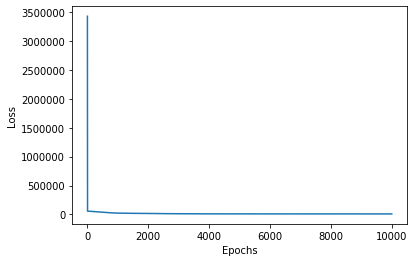

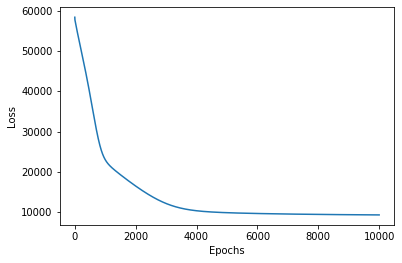

rmse of test:4.527363872489023


In [180]:
dl = DeepLearning([13,13,13,1],epochs=10000)
dl.fit(X_train.to_numpy(), Y_train.to_numpy())

import matplotlib.pyplot as plt
plt.plot(range(dl.epochs),dl._loss_history)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(dl.epochs)[2:],dl._loss_history[2:])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

print('rmse of test:'+str(np.sqrt(np.mean((dl.predict_proba(X_test)-Y_test)**2))))

Iteration:      0 - cost: 216963.470798 
Iteration:   1000 - cost: 30987.216951 
Iteration:   2000 - cost: 20024.868231 
Iteration:   3000 - cost: 16734.625865 
Iteration:   4000 - cost: 13621.155553 
Iteration:   5000 - cost: 11263.205182 
Iteration:   6000 - cost: 10313.903858 
Iteration:   7000 - cost: 9974.288935 
Iteration:   8000 - cost: 9755.395522 
Iteration:   9000 - cost: 9582.578959 


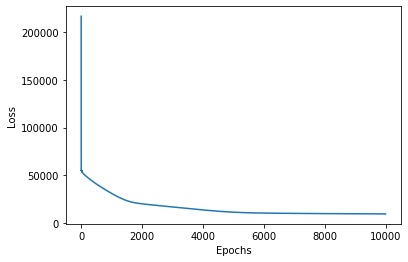

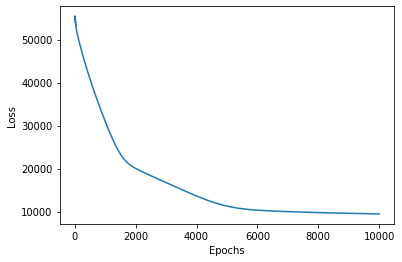

rmse of test:4.5540144678790355


In [209]:
dl = DeepLearning([13,6,4,4,4,4,2,2,2,2,1,1,1],epochs=10000)
#dl = DeepLearning([13,6,6,4,2,2,2,1],epochs=10000)

dl.fit(X_train.to_numpy(), Y_train.to_numpy())

import matplotlib.pyplot as plt
plt.plot(range(dl.epochs),dl._loss_history)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(dl.epochs)[2:],dl._loss_history[2:])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

print('rmse of test:'+str(np.sqrt(np.mean((dl.predict_proba(X_test)-Y_test)**2))))

In [130]:
#######Xavier Initialization

layer_of_units = [13,3,3]

for i in range(len(layer_of_units) - 1):
    limit = np.sqrt(6/(layer_of_units[i] + layer_of_units[i+1]))
    parameters = {}
    parameters['W{}'.format(i + 1)] = np.random.uniform(-limit,limit,size=(layer_of_units[i + 1],layer_of_units[i]))
    parameters['B{}'.format(i + 1)] = np.random.rand(layer_of_units[i + 1], 1)
    print(parameters)

{'W1': array([[ 0.03610915, -0.30852051,  0.04497096, -0.23199085, -0.03965891,
        -0.0672821 , -0.25353561, -0.04493945, -0.50390126,  0.41668665,
        -0.55754685, -0.11121261,  0.13389651],
       [ 0.36370432,  0.39837117, -0.17603915,  0.33864026, -0.61037967,
        -0.34179032,  0.52709893,  0.22619149, -0.1482665 ,  0.19598476,
        -0.00435905, -0.06612563, -0.00788509],
       [-0.00886266, -0.03115532, -0.01444542,  0.26802163, -0.06131938,
        -0.19691273,  0.29724817,  0.32946177,  0.57873837,  0.09045829,
        -0.49344089,  0.03489072, -0.46314091]]), 'B1': array([[0.67745902],
       [0.22631781],
       [0.3049127 ]])}
{'W2': array([[-0.53743479, -0.95860959,  0.83301362],
       [-0.12337925, -0.75670266,  0.67483187],
       [-0.24894219, -0.10706379,  0.24347682]]), 'B2': array([[0.75116258],
       [0.84505989],
       [0.94179365]])}


# Base1 model- Xavier initialization

In [147]:
class DeepLearning:
    """
    This class defines the vanilla optimization of a deep learning model.
    Args:
        layer_of_units (list): A list to specify the number of units in each layer.
    """
    def __init__(self, layer_of_units,epochs):
        self._n_layers = len(layer_of_units)
        self.epochs=epochs
        parameters = {}
        for i in range(self._n_layers - 1):
            limit = np.sqrt(6/(layer_of_units[i] + layer_of_units[i+1]))
            parameters['W{}'.format(i + 1)] = np.random.uniform(-limit,limit,size=(layer_of_units[i + 1],layer_of_units[i]))
            parameters['B{}'.format(i + 1)] = np.random.rand(layer_of_units[i + 1], 1)
        self._parameters = parameters

    def single_layer_forward_propagation(self, A_previous, W_current, B_current):
        """
        This function returns the output of a single layer of forward propagation.
        Args:
            A_previous (ndarray): The Sigmoid output from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
        """
        Z_current = np.dot(W_current, A_previous) + B_current
        A_current = Z_current
        return A_current, Z_current
    def forward_propagation(self):
        """
        This function returns the output of a complete round of forward propagation.
        """
        self._m = self._X_train.shape[0]
        X_train_T = self._X_train.copy().T
        cache = {}
        A_current = X_train_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            cache["A{}".format(i)] = A_previous
            cache["Z{}".format(i + 1)] = Z_current
        self._cache = cache
        self._A_current = A_current

    def single_layer_backward_propagation(self, dA_current, W_current, B_current, Z_current, A_previous):
        """
        This function returns the output of a single layer of backward propagation.
        Args:
            dA_current (ndarray): The output of the derivative of Sigmoid function from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
            Z_current (ndarray): The multiplication of weights, bias and output from previous layer.
            A_previous (ndarray): The Sigmoid output from previous layer.
        """
        dZ_current = dA_current 
        dW_current = np.dot(dZ_current, A_previous.T) / self._m
        dB_current = np.sum(dZ_current, axis=1, keepdims=True) / self._m
        dA_previous = np.dot(W_current.T, dZ_current)
        return dA_previous, dW_current, dB_current
    def backward_propagation(self):
        """
        This function performs a complete round of backward propagation to update weights and bias.
        """
        gradients = {}
        self.forward_propagation()
        Y_hat = self._A_current.copy()
        Y_train = self._y_train.copy().reshape(1, self._m)
        dA_previous = - 2*(Y_train-Y_hat)
        for i in reversed(range(dl._n_layers - 1)):
            dA_current = dA_previous
            A_previous = self._cache["A{}".format(i)]
            Z_current = self._cache["Z{}".format(i+1)]
            W_current = self._parameters["W{}".format(i+1)]
            B_current = self._parameters["B{}".format(i+1)]
            dA_previous, dW_current, dB_current = self.single_layer_backward_propagation(dA_current, W_current, B_current, Z_current, A_previous)
            gradients["dW{}".format(i + 1)] = dW_current
            gradients["dB{}".format(i + 1)] = dB_current
        self._gradients = gradients
    def cost_function(self):
        """
        This function returns the cross entropy given weights and bias.
        """
        Y_hat = self._A_current.copy()
        self._Y_hat = Y_hat
        Y_train = self._y_train.copy().reshape(1, self._m)
        ce = (Y_train-Y_hat)**2
        
        return np.sum(ce)
    #def accuracy_score(self):
    #    """
    #    This function returns the accuracy score given weights and bias.
    #    """
    #    p_pred = self._Y_hat.ravel()
    #    y_pred = np.where(p_pred > 0.5, 1, 0)
    #    y_true = self._y_train
    #    accuracy = (y_pred == y_true).sum() / y_pred.size
    #    return accuracy
    def gradient_descent(self):
        """
        This function performs vanilla gradient descent to update weights and bias.
        """
        for i in range(self._n_layers - 1):
            self._parameters["W{}".format(i + 1)] -= self._learning_rate * self._gradients["dW{}".format(i + 1)]
            self._parameters["B{}".format(i + 1)] -= self._learning_rate * self._gradients["dB{}".format(i + 1)]
    def fit(self, X_train, y_train, learning_rate=0.0001):
        """
        This function uses multiple rounds of forward propagations and backward propagations to optimize weights and bias.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
            epochs (int): The number of iterations to update the model weights.
            learning_rate (float): The learning rate of gradient descent.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        self._learning_rate = learning_rate
        loss_history = []
        #accuracy_history = []
        n_prints = 10
        print_iter = self.epochs // n_prints
        for i in range(self.epochs):
            self.forward_propagation()
            ce = self.cost_function()
            #accuracy = self.accuracy_score()
            loss_history.append(ce)
            #accuracy_history.append(accuracy)
            self.backward_propagation()
            self.gradient_descent()
            if i % print_iter == 0:
                print("Iteration: {:6} - cost: {:.6f} ".format(i, ce))
        self._loss_history = loss_history
    def predict_proba(self, X_test):
        """
        This function returns predicted probability for class 1 with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        X_test_T = X_test.copy().T
        A_current = X_test_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            self._cache["A{}".format(i)] = A_previous
            self._cache["Z{}".format(i + 1)] = Z_current
        Y_hat_1 = A_current.copy().ravel()
        return Y_hat_1
    
        #self._accuracy_history = accuracy_history

Iteration:      0 - cost: 210997.239386 
Iteration:   1000 - cost: 12760.723626 
Iteration:   2000 - cost: 9648.247363 
Iteration:   3000 - cost: 9361.900847 
Iteration:   4000 - cost: 9236.709048 
Iteration:   5000 - cost: 9165.958329 
Iteration:   6000 - cost: 9126.362055 
Iteration:   7000 - cost: 9104.748874 
Iteration:   8000 - cost: 9093.217485 
Iteration:   9000 - cost: 9087.172398 


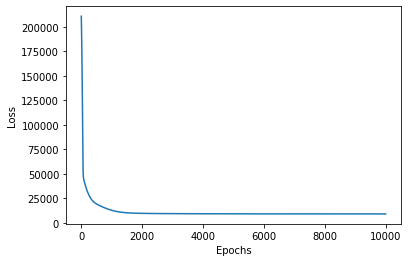

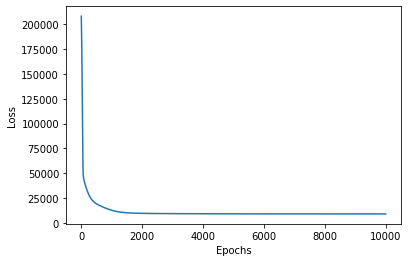

rmse of test:4.5574135762659305


In [148]:
dl = DeepLearning([13,4,4,4,1],10000)
dl.fit(X_train.to_numpy(), Y_train.to_numpy())

import matplotlib.pyplot as plt

plt.plot(range(dl.epochs),dl._loss_history)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(dl.epochs)[2:],dl._loss_history[2:])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

print('rmse of test:'+str(np.sqrt(np.mean((dl.predict_proba(X_test)-Y_test)**2))))

# Base 2-drop out

In [150]:
class DeepLearning:
    """
    This class defines the vanilla optimization of a deep learning model.
    Args:
        layer_of_units (list): A list to specify the number of units in each layer.
    """
    def __init__(self, layer_of_units,level_drop,epochs):
        self._n_layers = len(layer_of_units)
        self.epochs = epochs
        
        parameters = {}
        for i in range(self._n_layers - 1):
            parameters['W{}'.format(i + 1)] = np.random.rand(layer_of_units[i + 1], layer_of_units[i])
            parameters['B{}'.format(i + 1)] = np.random.rand(layer_of_units[i + 1], 1)
        self._parameters = parameters
        self.level_=level_drop
    def single_layer_forward_propagation(self, A_previous, W_current, B_current):
        """
        This function returns the output of a single layer of forward propagation.
        Args:
            A_previous (ndarray): The Sigmoid output from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
        """
        Z_current = np.dot(W_current, A_previous) + B_current
        A_current = Z_current
        A_current = dropout(Z_current,self.level_)
        return A_current, Z_current
    def forward_propagation(self):
        """
        This function returns the output of a complete round of forward propagation.
        """
        self._m = self._X_train.shape[0]
        X_train_T = self._X_train.copy().T
        cache = {}
        A_current = X_train_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            cache["A{}".format(i)] = A_previous
            cache["Z{}".format(i + 1)] = Z_current
        self._cache = cache
        self._A_current = A_current

    def single_layer_backward_propagation(self, dA_current, W_current, B_current, Z_current, A_previous):
        """
        This function returns the output of a single layer of backward propagation.
        Args:
            dA_current (ndarray): The output of the derivative of Sigmoid function from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
            Z_current (ndarray): The multiplication of weights, bias and output from previous layer.
            A_previous (ndarray): The Sigmoid output from previous layer.
        """
        dZ_current = dA_current 
        dW_current = np.dot(dZ_current, A_previous.T) / self._m
        dB_current = np.sum(dZ_current, axis=1, keepdims=True) / self._m
        dA_previous = np.dot(W_current.T, dZ_current)
        return dA_previous, dW_current, dB_current
    def backward_propagation(self):
        """
        This function performs a complete round of backward propagation to update weights and bias.
        """
        gradients = {}
        self.forward_propagation()
        Y_hat = self._A_current.copy()
        Y_train = self._y_train.copy().reshape(1, self._m)
        dA_previous = - 2*(Y_train-Y_hat)
        for i in reversed(range(dl._n_layers - 1)):
            dA_current = dA_previous
            A_previous = self._cache["A{}".format(i)]
            Z_current = self._cache["Z{}".format(i+1)]
            W_current = self._parameters["W{}".format(i+1)]
            B_current = self._parameters["B{}".format(i+1)]
            dA_previous, dW_current, dB_current = self.single_layer_backward_propagation(dA_current, W_current, B_current, Z_current, A_previous)
            gradients["dW{}".format(i + 1)] = dW_current
            gradients["dB{}".format(i + 1)] = dB_current
        self._gradients = gradients
    def cost_function(self):
        """
        This function returns the cross entropy given weights and bias.
        """
        Y_hat = self._A_current.copy()
        self._Y_hat = Y_hat
        Y_train = self._y_train.copy().reshape(1, self._m)
        ce =  (Y_train-Y_hat)**2
        
        return np.sum(ce)
    #def accuracy_score(self):
    #    """
    #    This function returns the accuracy score given weights and bias.
    #    """
    #    p_pred = self._Y_hat.ravel()
    #    y_pred = np.where(p_pred > 0.5, 1, 0)
    #    y_true = self._y_train
    #    accuracy = (y_pred == y_true).sum() / y_pred.size
    #    return accuracy
    def gradient_descent(self):
        """
        This function performs vanilla gradient descent to update weights and bias.
        """
        for i in range(self._n_layers - 1):
            self._parameters["W{}".format(i + 1)] -= self._learning_rate * self._gradients["dW{}".format(i + 1)]
            self._parameters["B{}".format(i + 1)] -= self._learning_rate * self._gradients["dB{}".format(i + 1)]
    def fit(self, X_train, y_train, learning_rate=0.0001):
        """
        This function uses multiple rounds of forward propagations and backward propagations to optimize weights and bias.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
            epochs (int): The number of iterations to update the model weights.
            learning_rate (float): The learning rate of gradient descent.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        self._learning_rate = learning_rate
        loss_history = []
        #accuracy_history = []
        n_prints = 10
        print_iter = self.epochs // n_prints
        for i in range(self.epochs):
            self.forward_propagation()
            ce = self.cost_function()
            #accuracy = self.accuracy_score()
            loss_history.append(ce)
            #accuracy_history.append(accuracy)
            self.backward_propagation()
            self.gradient_descent()
            if i % print_iter == 0:
                print("Iteration: {:6} - cost: {:.6f} ".format(i, ce))
        self._loss_history = loss_history
    def predict_proba(self, X_test):
        """
        This function returns predicted probability for class 1 with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        X_test_T = X_test.copy().T
        A_current = X_test_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            self._cache["A{}".format(i)] = A_previous
            self._cache["Z{}".format(i + 1)] = Z_current
        Y_hat_1 = A_current.copy().ravel()
        return Y_hat_1

In [151]:
import numpy as np
def dropout(x, level):
    #if level < 0. or level >= 1: #level是概率值，必须在0~1之间
    #    raise ValueError('Dropout level must be in interval [0, 1[.')
    retain_prob = 1. - level
    random_tensor = np.random.binomial(n=1, p=retain_prob, size=x.shape) 
    x *= random_tensor
    #x /= retain_prob
    return x

Iteration:      0 - cost: 1774857.617981 
Iteration:   1000 - cost: 65645.537340 
Iteration:   2000 - cost: 49379.204275 
Iteration:   3000 - cost: 52185.937839 
Iteration:   4000 - cost: 58104.616193 
Iteration:   5000 - cost: 46140.681442 
Iteration:   6000 - cost: 47287.619379 
Iteration:   7000 - cost: 44761.640501 
Iteration:   8000 - cost: 46760.891343 
Iteration:   9000 - cost: 44222.422055 


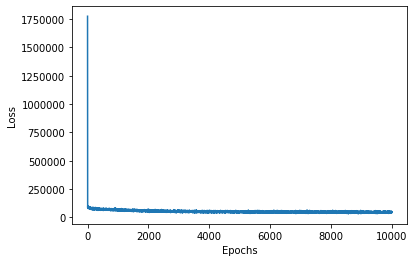

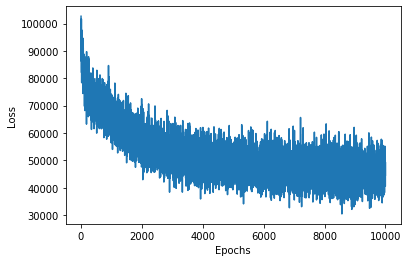

rmse of test:8.952947640647416


In [153]:
dl = DeepLearning([13,13,13,1],0.1,10000)
dl.fit(X_train.to_numpy(), Y_train.to_numpy())

import matplotlib.pyplot as plt

plt.plot(range(10000),dl._loss_history)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(dl.epochs)[2:],dl._loss_history[2:])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

print('rmse of test:'+str(np.sqrt(np.mean((dl.predict_proba(X_test)-Y_test)**2))))


# Base 3-drop out and Xavier initialization

In [155]:
class DeepLearning:
    """
    This class defines the vanilla optimization of a deep learning model.
    Args:
        layer_of_units (list): A list to specify the number of units in each layer.
    """
    def __init__(self, layer_of_units,level_drop,epochs):
        self._n_layers = len(layer_of_units)
        self.epochs = epochs
        self.level_=level_drop
        parameters = {}
        for i in range(self._n_layers - 1):
            limit = np.sqrt(6/(layer_of_units[i] + layer_of_units[i+1]))
            parameters['W{}'.format(i + 1)] = np.random.uniform(-limit,limit,size=(layer_of_units[i + 1],layer_of_units[i]))
            parameters['B{}'.format(i + 1)] = np.random.rand(layer_of_units[i + 1], 1)
        self._parameters = parameters

    def single_layer_forward_propagation(self, A_previous, W_current, B_current):
        """
        This function returns the output of a single layer of forward propagation.
        Args:
            A_previous (ndarray): The Sigmoid output from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
        """
        Z_current = np.dot(W_current, A_previous) + B_current
        A_current = dropout(Z_current,self.level_)
        return A_current, Z_current
    def forward_propagation(self):
        """
        This function returns the output of a complete round of forward propagation.
        """
        self._m = self._X_train.shape[0]
        X_train_T = self._X_train.copy().T
        cache = {}
        A_current = X_train_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            cache["A{}".format(i)] = A_previous
            cache["Z{}".format(i + 1)] = Z_current
        self._cache = cache
        self._A_current = A_current

    def single_layer_backward_propagation(self, dA_current, W_current, B_current, Z_current, A_previous):
        """
        This function returns the output of a single layer of backward propagation.
        Args:
            dA_current (ndarray): The output of the derivative of Sigmoid function from previous layer.
            W_current (ndarray): The weights of current layer.
            B_current (ndarray): The bias of current layer.
            Z_current (ndarray): The multiplication of weights, bias and output from previous layer.
            A_previous (ndarray): The Sigmoid output from previous layer.
        """
        dZ_current = dA_current 
        dW_current = np.dot(dZ_current, A_previous.T) / self._m
        dB_current = np.sum(dZ_current, axis=1, keepdims=True) / self._m
        dA_previous = np.dot(W_current.T, dZ_current)
        return dA_previous, dW_current, dB_current
    def backward_propagation(self):
        """
        This function performs a complete round of backward propagation to update weights and bias.
        """
        gradients = {}
        self.forward_propagation()
        Y_hat = self._A_current.copy()
        Y_train = self._y_train.copy().reshape(1, self._m)
        dA_previous = - 2*(Y_train-Y_hat)
        for i in reversed(range(dl._n_layers - 1)):
            dA_current = dA_previous
            A_previous = self._cache["A{}".format(i)]
            Z_current = self._cache["Z{}".format(i+1)]
            W_current = self._parameters["W{}".format(i+1)]
            B_current = self._parameters["B{}".format(i+1)]
            dA_previous, dW_current, dB_current = self.single_layer_backward_propagation(dA_current, W_current, B_current, Z_current, A_previous)
            gradients["dW{}".format(i + 1)] = dW_current
            gradients["dB{}".format(i + 1)] = dB_current
        self._gradients = gradients
    def cost_function(self):
        """
        This function returns the cross entropy given weights and bias.
        """
        Y_hat = self._A_current.copy()
        self._Y_hat = Y_hat
        Y_train = self._y_train.copy().reshape(1, self._m)
        ce =  (Y_train-Y_hat)**2
        
        return np.sum(ce)
    #def accuracy_score(self):
    #    """
    #    This function returns the accuracy score given weights and bias.
    #    """
    #    p_pred = self._Y_hat.ravel()
    #    y_pred = np.where(p_pred > 0.5, 1, 0)
    #    y_true = self._y_train
    #    accuracy = (y_pred == y_true).sum() / y_pred.size
    #    return accuracy
    def gradient_descent(self):
        """
        This function performs vanilla gradient descent to update weights and bias.
        """
        for i in range(self._n_layers - 1):
            self._parameters["W{}".format(i + 1)] -= self._learning_rate * self._gradients["dW{}".format(i + 1)]
            self._parameters["B{}".format(i + 1)] -= self._learning_rate * self._gradients["dB{}".format(i + 1)]
    def fit(self, X_train, y_train, learning_rate=0.001):
        """
        This function uses multiple rounds of forward propagations and backward propagations to optimize weights and bias.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
            epochs (int): The number of iterations to update the model weights.
            learning_rate (float): The learning rate of gradient descent.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        self._learning_rate = learning_rate
        loss_history = []
        #accuracy_history = []
        n_prints = 10
        print_iter = self.epochs // n_prints
        self.eval_ = {'cost': []}
        for i in range(self.epochs):
            self.forward_propagation()
            ce = self.cost_function()
            #accuracy = self.accuracy_score()
            loss_history.append(ce)
            #accuracy_history.append(accuracy)
            self.backward_propagation()
            self.gradient_descent()
            if i % print_iter == 0:
                print("Iteration: {:6} - cost: {:.6f} ".format(i, ce))
        self._loss_history = loss_history

    def predict_proba(self, X_test):
        """
        This function returns predicted probability for class 1 with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        X_test_T = X_test.copy().T
        A_current = X_test_T
        for i in range(self._n_layers - 1):
            A_previous = A_current
            W_current = self._parameters["W{}".format(i + 1)]
            B_current = self._parameters["B{}".format(i + 1)]
            A_current, Z_current = self.single_layer_forward_propagation(A_previous, W_current, B_current)
            self._cache["A{}".format(i)] = A_previous
            self._cache["Z{}".format(i + 1)] = Z_current
        Y_hat_1 = A_current.copy().ravel()
        return Y_hat_1
    
        #self._accuracy_history = accuracy_history

Iteration:      0 - cost: 199186.629837 
Iteration:   1000 - cost: 38701.764932 
Iteration:   2000 - cost: 46517.323154 
Iteration:   3000 - cost: 37212.574212 
Iteration:   4000 - cost: 28538.238987 
Iteration:   5000 - cost: 37696.067228 
Iteration:   6000 - cost: 35332.245935 
Iteration:   7000 - cost: 40851.290370 
Iteration:   8000 - cost: 35321.813815 
Iteration:   9000 - cost: 37829.016125 


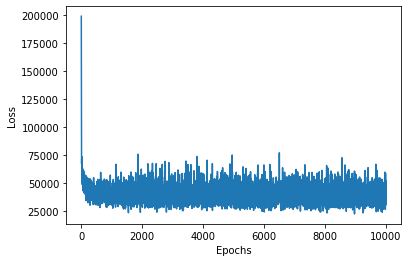

rmse of test:7.876399311413889


In [156]:
dl = DeepLearning([13,13,13,1],0.1,10000)
dl.fit(X_train.to_numpy(), Y_train.to_numpy())

import matplotlib.pyplot as plt

plt.plot(range(dl.epochs),dl._loss_history)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

print('rmse of test:'+str(np.sqrt(np.mean((dl.predict_proba(X_test)-Y_test)**2))))